# ・**はじめに。**プログラム言語としてpythonを用いつつ、人工知能（AI）を動かしてみます。今回は比較的簡単なAIアルゴリズムの例として「単回帰分析」と「CNN（畳み込みニューラルネットワーク）を用いた手書き文字分類」に挑戦します。

# ・「そもそもpythonって何？」「使い方が分からない」という方は[こちら（下線部をクリック）で復習してみてください](https://utokyo-ipp.github.io/)。pythonというプログラム言語の基本的な操作を学ぶことが出来ます。皆さんの習熟度にあわせて講義は展開していきます。

# ・まずは単回帰分析です。「単回帰分析ってそもそも何？」という方は[こちらをクリック](https://service.nikkei-r.co.jp/glossary/simple-regression-analysis)してみてください。数値で計測できる二つの事象がある時、それらの相関関係を分析することです（一方が説明変数、他方が目的変数）。

# ・それでは早速「単回帰分析」から始めてみましょう。ここで用いるのはUC バークレー大学の UCI Machine Leaning Repository にて公開されている、「Wine Quality Data Set (ワインの品質)」の赤ワインのデータセットです。 **太字**


In [1]:
!wget http://pythondatascience.plavox.info/wp-content/uploads/2016/07/winequality-red.csv


--2023-08-27 08:57:10--  http://pythondatascience.plavox.info/wp-content/uploads/2016/07/winequality-red.csv
Resolving pythondatascience.plavox.info (pythondatascience.plavox.info)... 54.65.85.142, 18.180.11.37
Connecting to pythondatascience.plavox.info (pythondatascience.plavox.info)|54.65.85.142|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://pythondatascience.plavox.info/wp-content/uploads/2016/07/winequality-red.csv [following]
--2023-08-27 08:57:11--  https://pythondatascience.plavox.info/wp-content/uploads/2016/07/winequality-red.csv
Connecting to pythondatascience.plavox.info (pythondatascience.plavox.info)|54.65.85.142|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 84199 (82K) [application/octet-stream]
Saving to: ‘winequality-red.csv’

winequality-red.csv 100%[===================>]  82.23K   370KB/s    in 0.2s    

2023-08-27 08:57:12 (370 KB/s) - ‘winequality-red.csv’ saved [84199/84199]



In [2]:
import pandas as pd

df = pd.read_csv('winequality-red.csv', sep=';')

In [3]:
#以下のコマンドで読み込んだデータの全体像が可視化されます。
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [ ]:
#ワインを構成する要素には様々なものがありますが、ここでは説明変数に「濃さ（density）」を採用し、目的変数に「アルコール濃度（alcohol）」を採用します。
x = df[['density']]
y = df[['alcohol']]

In [4]:
#それではscikitlearnを用いて単回帰分析（Linear regression）をしてみます。

from sklearn.linear_model import LinearRegression

model_lr = LinearRegression()
model_lr.fit(x, y)

LinearRegression()

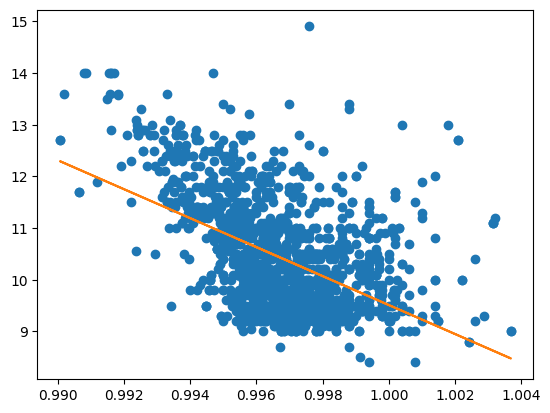

モデル関数の回帰変数 w1: -280.164
モデル関数の切片 w2: 289.675
y= -280.164x + 289.675
決定係数 R^2：  0.24619436439710696


In [5]:
#結果を描画してみます。この時、matplotlib.pyplotを用います。濃さが濃いほど、実はアルコール度数は低くなっていることが分かります。

import matplotlib.pyplot as plt
import seaborn

plt.plot(x, y, 'o')
plt.plot(x, model_lr.predict(x), linestyle="solid")
plt.show()

print('モデル関数の回帰変数 w1: %.3f' %model_lr.coef_)
print('モデル関数の切片 w2: %.3f' %model_lr.intercept_)
print('y= %.3fx + %.3f' % (model_lr.coef_ , model_lr.intercept_))
print('決定係数 R^2： ', model_lr.score(x, y))

In [6]:
#さらに詳しく統計分析をしてみましょう。
#細かなことは自習に任せるとして、 P>|t|を見ます。これが0に近いほどここで構築したモデル（線形モデル）の妥当性が高いということに統計学上ではされています。どうでしょうか？

import statsmodels.api as sm

x_add_const = sm.add_constant(x)
model_sm = sm.OLS(y, x_add_const).fit()
print(model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                alcohol   R-squared:                       0.246
Model:                            OLS   Adj. R-squared:                  0.246
Method:                 Least Squares   F-statistic:                     521.6
Date:                Sun, 27 Aug 2023   Prob (F-statistic):          3.94e-100
Time:                        09:06:08   Log-Likelihood:                -2144.1
No. Observations:                1599   AIC:                             4292.
Df Residuals:                    1597   BIC:                             4303.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        289.6753     12.227     23.691      0.0

# ・単回帰分析だけでは物足りない！と想った方は、[是非、こちらをクリックして重回帰分析に挑戦](https://qiita.com/karaage0703/items/f38d18afc1569fcc0418)してみましょう。この様にgoogleで検索をすると、知りたいアルゴリズムのコードが掲載されている場合が多々あります。若干の微調整が必要なことがしばしばですが、「分からなかったらばまずは検索」と覚えて下さい。

# ・それでは次にいよいよ「CNN（畳み込みニューラルネットワーク）」による画像分析に挑戦してみます。そもそもCNNって何？という方は[こちらをクリックして勉強](https://https://aismiley.co.jp/ai_news/cnn/)してみてください。

# ・今回は有名なMNISTというデータを用います。MNISTとはMixed National Institute of Standards and Technology databaseの略であり、手書きの文字について60000文字の訓練用データと、10000文字の検証用データが入っているデータセットのことを言います。

In [8]:
#それでは早速、MNISTをダウンロードしてみましょう。今回はTensorFlowを用います。Errorが出ますが、無視してかまいません。

from __future__ import absolute_import, division, print_function, unicode_literals

!pip install -q tensorflow-gpu==2.0.0-beta1
import tensorflow as tf

from tensorflow.keras import datasets, layers, models

ERROR: Could not find a version that satisfies the requirement tensorflow-gpu==2.0.0-beta1 (from versions: 2.8.0rc0, 2.8.0rc1, 2.8.0, 2.8.1, 2.8.2, 2.8.3, 2.8.4, 2.9.0rc0, 2.9.0rc1, 2.9.0rc2, 2.9.0, 2.9.1, 2.9.2, 2.9.3, 2.10.0rc0, 2.10.0rc1, 2.10.0rc2, 2.10.0rc3, 2.10.0, 2.10.1, 2.11.0rc0, 2.11.0rc1, 2.11.0rc2, 2.11.0, 2.12.0)
ERROR: No matching distribution found for tensorflow-gpu==2.0.0-beta1


In [11]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()



In [12]:
train_images

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [13]:
#これを今度はreshapeします。

train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

# ピクセルの値を 0~1 の間に正規化。
train_images, test_images = train_images / 255.0, test_images / 255.0

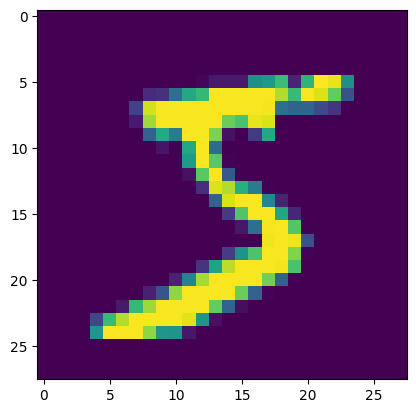

In [14]:
#1枚目を表示してみます。
#train_imagesに対してtrain_labelsが正解の番号を示しており、test_imagesにはtest_labelsが同様に対応しています。
import matplotlib.pyplot as plt
plt.imshow(train_images[0])

In [15]:
#それでは次にtestデータで訓練をするためのCNNのアーキテクチャを構築します。

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

#ここから先で10個出てくる出力から、活性化関数softmaxによりラベルの価が何であるのかを見分けます。
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

#全体を見渡します。
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

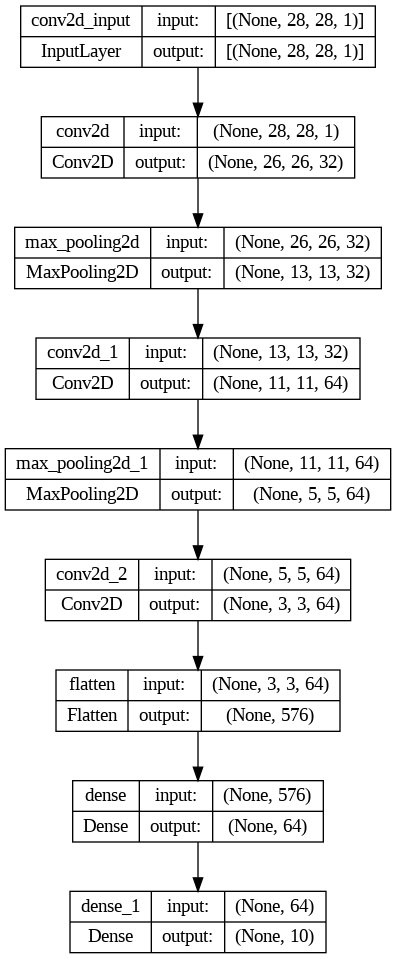

In [16]:
#もうちょっと可視化して見やすくします。

from tensorflow.keras.utils import plot_model

#グラフで可視化。
plot_model(model, show_shapes=True)

# ・ここでこの可視化したグラフで出てくる用語についてちょっと詳しく見てみましょう。

# ・まず[活性化関数](https://atmarkit.itmedia.co.jp/ait/articles/2003/26/news012.html)、そしてとりわけ[softmax](https://atmarkit.itmedia.co.jp/ait/articles/2004/08/news016.html)についてはそれぞれクリックしてみてみてください。

# ・次に[max pooling](https://hogetech.info/deep-learning/dl-basic5),[ flatten](https://www.kagoya.jp/howto/engineer/hpc/gpu-container3/), [dense](https://child-programmer.com/ai/keras/dense/)についてです。それぞれについてクリックしてみてください。

In [17]:
#それではこのモデルの精度を見てみます。モデルをコンパイルし、訓練用データで学習させます。学習の回数（epoch）は5回です。

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 82s 43ms/step - loss: 0.1563 - accuracy: 0.9512
Epoch 2/5
1875/1875 [==============================] - 85s 45ms/step - loss: 0.0456 - accuracy: 0.9860
Epoch 3/5
1875/1875 [==============================] - 83s 44ms/step - loss: 0.0354 - accuracy: 0.9887
Epoch 4/5
1875/1875 [==============================] - 74s 39ms/step - loss: 0.0250 - accuracy: 0.9920
Epoch 5/5
1875/1875 [==============================] - 73s 39ms/step - loss: 0.0210 - accuracy: 0.9932


In [18]:
#次に検証データ（10000件）を挿入し、精度を見ます。
#結果はどうでしょうか？かなりのレヴェルではないですか？

test_loss, test_acc = model.evaluate(test_images, test_labels)
print(test_acc)

313/313 [==============================] - 3s 10ms/step - loss: 0.0266 - accuracy: 0.9909
0.9908999800682068


# ・**最後に。**今回学んだのはあくまでもpythonを用いたアルゴリズムのほんの一部です。

# ・もっと学びたい人はたとえば[こちらのような参考テキストで学ぶ](https://www.amazon.co.jp/gp/product/4798167207/ref=ppx_yo_dt_b_search_asin_title?ie=UTF8&psc=1)のが良いでしょう。ただし文中のコードは動かなくなっている可能性もありますので、随時、検索をしてネット上で類似のコードを見ながら、根気強く学習することが必要です。

# **（以上）**

